<a href="https://colab.research.google.com/github/kunsangk/PHSX216N.02-Autumn/blob/main/indexrefractionipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

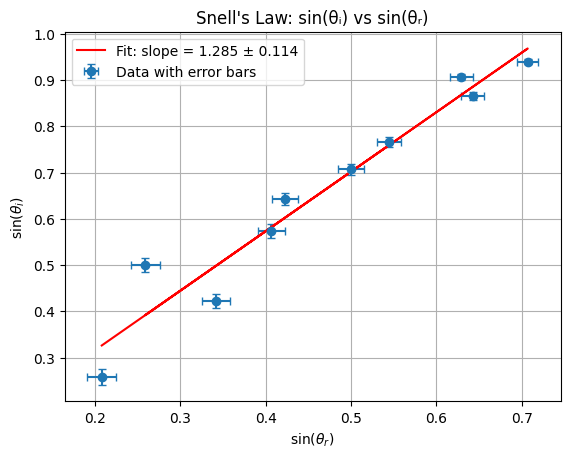

Index of Refraction of Water (n_water) = 1.285 ± 0.114


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

theta_i_deg = np.array([50,40,30,60,70,65,45,35,25,15])
theta_r_deg = np.array([33,25,15,40,45,39,30,24,20,12])

#UNCERTAINTY
delta_theta_deg = 1  # degrees

# Convert angles to radians
theta_i_rad = np.radians(theta_i_deg)
theta_r_rad = np.radians(theta_r_deg)

# Compute sine of angles
sin_theta_i = np.sin(theta_i_rad)
sin_theta_r = np.sin(theta_r_rad)

# Error propagation for sine
delta_sin_i = np.abs(np.sin(theta_i_rad) - np.sin(theta_i_rad + np.radians(delta_theta_deg)))
delta_sin_r = np.abs(np.sin(theta_r_rad) - np.sin(theta_r_rad + np.radians(delta_theta_deg)))

# Linear regression: sin(θᵢ) vs sin(θᵣ)
slope, intercept, r_value, p_value, std_err = linregress(sin_theta_r, sin_theta_i)

# Plot
plt.errorbar(sin_theta_r, sin_theta_i, xerr=delta_sin_r, yerr=delta_sin_i,
             fmt='o', label='Data with error bars', capsize=3)
plt.plot(sin_theta_r, slope * sin_theta_r + intercept, 'r-', label=f'Fit: slope = {slope:.3f} ± {std_err:.3f}')
plt.xlabel(r'$\sin(\theta_r)$')
plt.ylabel(r'$\sin(\theta_i)$')
plt.title('Snell\'s Law: sin(θᵢ) vs sin(θᵣ)')
plt.legend()
plt.grid(True)
plt.show()

# Print results
print(f"Index of Refraction of Water (n_water) = {slope:.3f} ± {std_err:.3f}")
